In [1]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [8]:
!mkdir -p /content/drive/MyDrive/ds_NikitaGupta/csv_files


In [9]:
!cp "/content/drive/MyDrive/fear_greed_index.csv" "/content/drive/MyDrive/ds_NikitaGupta/csv_files/"
!cp "/content/drive/MyDrive/historical_data.csv" "/content/drive/MyDrive/ds_NikitaGupta/csv_files/"


cp: cannot stat '/content/drive/MyDrive/fear_greed_index.csv': No such file or directory
cp: cannot stat '/content/drive/MyDrive/historical_data.csv': No such file or directory


In [10]:
#import os
#os.listdir('ds_NikitaGupta/csv_files')


['historical_data.csv', 'fear_greed_index.csv']

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_DIR = 'ds_NikitaGupta/csv_files'
# If using Drive, change DATA_DIR to '/content/drive/MyDrive/ds_NikitaGupta/csv_files'
fg_path = os.path.join(DATA_DIR, 'fear_greed_index.csv')
trades_path = os.path.join(DATA_DIR, 'historical_data.csv')


In [12]:
fg = pd.read_csv(fg_path, low_memory=False)
trades = pd.read_csv(trades_path, low_memory=False)
print("FG shape:", fg.shape)
print("Trades shape:", trades.shape)


FG shape: (2644, 4)
Trades shape: (211224, 16)


In [13]:
display(fg.head())
display(trades.head())
display(fg.info())
display(trades.info())


timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

None

In [14]:
# Standardize FG dataset
fg = fg.copy()
# Common column names: Date, Classification (Fear/Greed), maybe Score
# Find Date-like column
date_col = None
for c in fg.columns:
    if 'date' in c.lower() or 'time' in c.lower():
        date_col = c
        break

if date_col:
    fg['fg_date'] = pd.to_datetime(fg[date_col], errors='coerce')
else:
    # Try parsing first column
    fg['fg_date'] = pd.to_datetime(fg.iloc[:,0], errors='coerce')

# Normalize classification column
if 'Classification' in fg.columns:
    fg['Classification'] = fg['Classification'].astype(str).str.strip().str.title()
else:
    # try other names
    for c in fg.columns:
        if 'class' in c.lower() or 'label' in c.lower():
            fg['Classification'] = fg[c].astype(str).str.strip().str.title()
            break

fg = fg.sort_values('fg_date').reset_index(drop=True)
fg.head()


timestamp  value classification        date                       fg_date  \
0  1517463000     30           Fear  2018-02-01 1970-01-01 00:00:01.517463000   
1  1517549400     15   Extreme Fear  2018-02-02 1970-01-01 00:00:01.517549400   
2  1517635800     40           Fear  2018-02-03 1970-01-01 00:00:01.517635800   
3  1517722200     24   Extreme Fear  2018-02-04 1970-01-01 00:00:01.517722200   
4  1517808600     11   Extreme Fear  2018-02-05 1970-01-01 00:00:01.517808600   

  Classification  
0           Fear  
1   Extreme Fear  
2           Fear  
3   Extreme Fear  
4   Extreme Fear

In [15]:
os.makedirs('ds_NikitaGupta/outputs', exist_ok=True)
fg.to_csv('ds_NikitaGupta/csv_files/fear_greed_cleaned.csv', index=False)


In [16]:
trades = trades.copy()
# Find time/datetime column
tcol = None
for c in trades.columns:
    if 'time' in c.lower() or 'date' in c.lower() or 'timestamp' in c.lower():
        tcol = c
        break

if tcol:
    trades['trade_dt'] = pd.to_datetime(trades[tcol], errors='coerce')
else:
    # if there's a numeric unix timestamp
    for c in trades.columns:
        if trades[c].dtype.kind in 'iuf' and trades[c].dropna().astype(float).median() > 1e9:
            trades['trade_dt'] = pd.to_datetime(trades[c], unit='s', errors='coerce')
            tcol = c
            break

# Normalize common numeric columns
for name in ['closedPnL','closedpnl','closed_pnl','pnl']:
    if name in trades.columns:
        trades['closedPnL'] = pd.to_numeric(trades[name], errors='coerce')
        break

if 'size' in trades.columns:
    trades['size'] = pd.to_numeric(trades['size'], errors='coerce')

# normalize side and symbol
if 'side' in trades.columns:
    trades['side'] = trades['side'].astype(str).str.lower().str.strip()
if 'symbol' in trades.columns:
    trades['symbol'] = trades['symbol'].astype(str).str.strip()

trades.to_csv('ds_NikitaGupta/csv_files/trades_cleaned.csv', index=False)
trades.head()


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp            trade_dt  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12 22:50:00  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12 22:50:00  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12 22:50:00  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12 22:50:00  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12 22:50:00

In [18]:
fg_counts = fg.dropna(subset=['fg_date','Classification']).groupby(['fg_date','Classification']).size().unstack(fill_value=0)
fig = fg_counts.plot(figsize=(12,4)).get_figure()
fig.savefig('ds_NikitaGupta/outputs/fear_greed_timeline.png', bbox_inches='tight')
plt.close(fig)


In [19]:
score_cols = [c for c in fg.columns if 'score' in c.lower() or 'value' in c.lower()]
if score_cols:
    s = score_cols[0]
    plt.figure(figsize=(12,3))
    plt.plot(fg['fg_date'], pd.to_numeric(fg[s], errors='coerce'))
    plt.title(f'Fear-Greed numeric series ({s})')
    plt.tight_layout()
    plt.savefig('ds_NikitaGupta/outputs/fear_greed_score_series.png')
    plt.close()


In [20]:
trades_by_day = trades.dropna(subset=['trade_dt']).copy()
trades_by_day['trade_date'] = trades_by_day['trade_dt'].dt.date
daily_counts = trades_by_day.groupby('trade_date').size()
plt.figure(figsize=(12,3))
daily_counts.plot()
plt.title('Trades per day')
plt.tight_layout()
plt.savefig('ds_NikitaGupta/outputs/trades_per_day.png')
plt.close()

# PnL histogram
if 'closedPnL' in trades.columns:
    plt.figure(figsize=(8,4))
    trades['closedPnL'].dropna().hist(bins=80)
    plt.title('Closed PnL distribution')
    plt.tight_layout()
    plt.savefig('ds_NikitaGupta/outputs/pnl_histogram.png')
    plt.close()


In [ ]:
# NoteBook 2

In [21]:
import pandas as pd
fg = pd.read_csv('ds_NikitaGupta/csv_files/fear_greed_cleaned.csv', parse_dates=['fg_date'], low_memory=False)
trades = pd.read_csv('ds_NikitaGupta/csv_files/trades_cleaned.csv', parse_dates=['trade_dt'], low_memory=False)

# Keep only date parts for merging
fg['date'] = pd.to_datetime(fg['fg_date']).dt.date
trades['date'] = pd.to_datetime(trades['trade_dt']).dt.date

# Left-join trades with sentiment by date
merged = trades.merge(fg[['date','Classification']], on='date', how='left')
merged['Classification'] = merged['Classification'].fillna('Unknown')
merged.to_csv('ds_NikitaGupta/csv_files/merged_master.csv', index=False)
merged.head()


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp            trade_dt  \
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12 22:50:00   
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12 22:50:00   
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12 22:50:00   
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12 22:50:00   
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12 22:50:00   

         date Classification  
0  2024-02-12        Unknown  
1  2024-02-12        Unknown  
2  2024-02-12        Unknown  
3  2024-02-12        Unknown  
4  2024-02-12        Unknown

In [34]:
print(df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_dt', 'date', 'Classification', 'size']


In [35]:
required_cols = ['Classification']

for col in required_cols:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        print(f"✅ Found: {col}")


✅ Found: Classification


In [36]:
print(merged.columns.tolist())


['account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_dt', 'date', 'Classification']


In [37]:

# Example: adjust based on your CSV
merged.rename(columns={
    'Account': 'account',        # change to lowercase standard
    'ClosedPnL': 'closedPnL',
    'Size': 'size'
}, inplace=True)

# Check again
print(merged.columns.tolist())


['account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_dt', 'date', 'Classification']


In [39]:
# Standardize PnL column
pnl_cols = [c for c in merged.columns if 'pnl' in c.lower()]
if pnl_cols:
    merged['closedPnL'] = pd.to_numeric(merged[pnl_cols[0]], errors='coerce')
else:
    print("❌ No PnL column found")

# Standardize size column
size_cols = [c for c in merged.columns if 'size' in c.lower()]
if size_cols:
    merged['size'] = pd.to_numeric(merged[size_cols[0]], errors='coerce')
else:
    print("❌ No size column found")

# Standardize account column
account_cols = [c for c in merged.columns if 'account' in c.lower()]
if account_cols:
    merged['account'] = merged[account_cols[0]]
else:
    print("❌ No account column found")

# Check first rows
merged.head()


account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  52017706630     True  0.345404  8.950000e+14   
1         0.0  ...  52017706630     True  0.005600  4.430000e+14   
2         0.0  ...  52017706630     True  0.050431  6.600000e+14   
3         0.0  ...  52017706630     True  0.050043  1.080000e+15   
4         0.0  ...  52017706630     True  0.003055  1.050000e+15   

      Timestamp            trade_dt        date Classification closedPnL  \
0  1.730000e+12 2024-02-12 22:50:00  2024-02-12        Unknown       0.0   
1  1.730000e+12 2024-02-12 22:50:00  2024-02-12        Unknown       0.0   
2  1.730000e+12 2024-02-12 22:50:00  2024-02-12        Unknown       0.0   
3  1.730000e+12 2024-02-12 22:50:00  2024-02-12        Unknown       0.0   
4  1.730000e+12 2024-02-12 22:50:00  2024-02-12        Unknown       0.0   

     size  
0  986.87  
1   16.00  
2  144.09  
3  142.98  
4    8.73  

[5 rows x 21 columns]

In [40]:
sentiment_summary = merged.groupby('Classification').agg(
    total_trades=('account', 'count'),
    avg_pnl=('closedPnL', 'mean'),
    median_pnl=('closedPnL', 'median'),
    avg_size=('size', 'mean'),
    win_rate=('closedPnL', lambda x: (x>0).mean())
).reset_index()

sentiment_summary


Classification  total_trades    avg_pnl  median_pnl     avg_size  win_rate
0        Unknown        211224  48.749001         0.0  4623.364979  0.411265

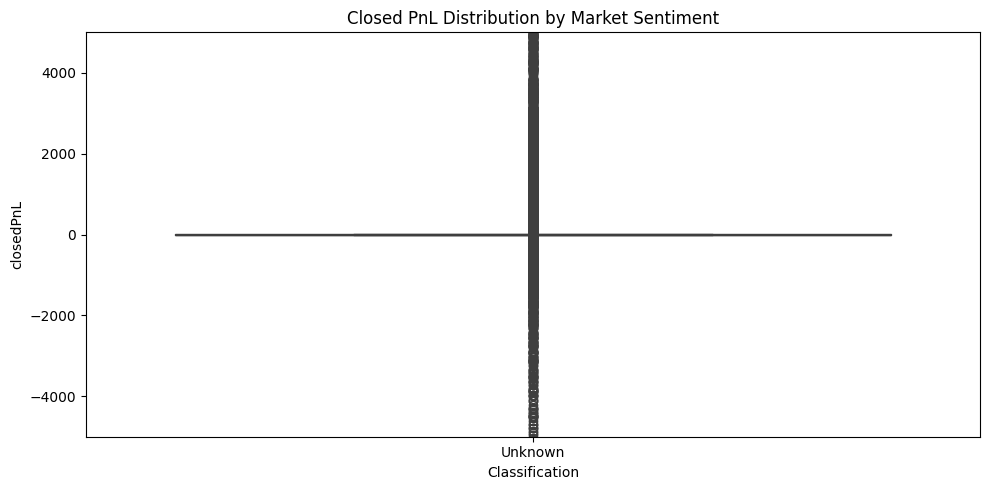

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='Classification', y='closedPnL', data=merged)
plt.title('Closed PnL Distribution by Market Sentiment')
plt.ylim(-5000, 5000)  # adjust according to your data
plt.tight_layout()
plt.savefig('ds_NikitaGupta/outputs/pnl_by_sentiment.png')
plt.show()


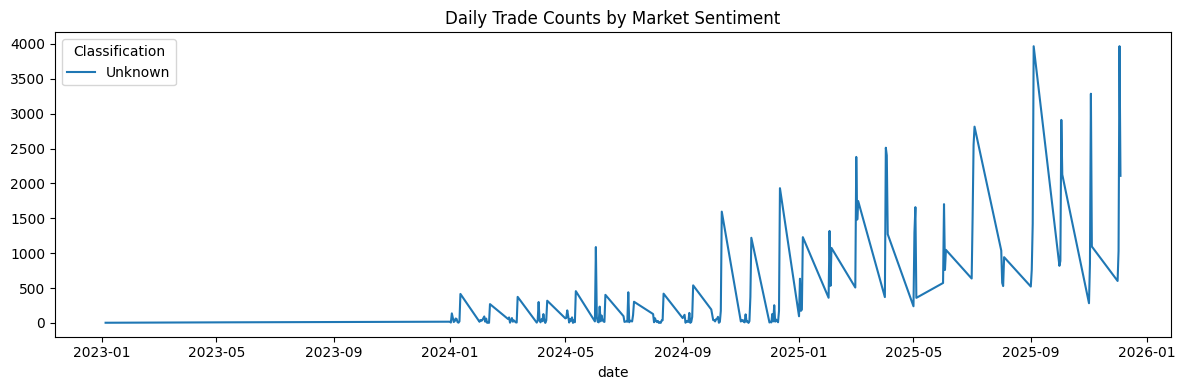

In [57]:
daily_counts = merged.groupby(['date','Classification']).size().unstack(fill_value=0)

plt.figure(figsize=(12,4))
daily_counts.plot(ax=plt.gca())
plt.title('Daily Trade Counts by Market Sentiment')
plt.tight_layout()
plt.savefig('ds_NikitaGupta/outputs/trades_by_sentiment.png')
plt.show()


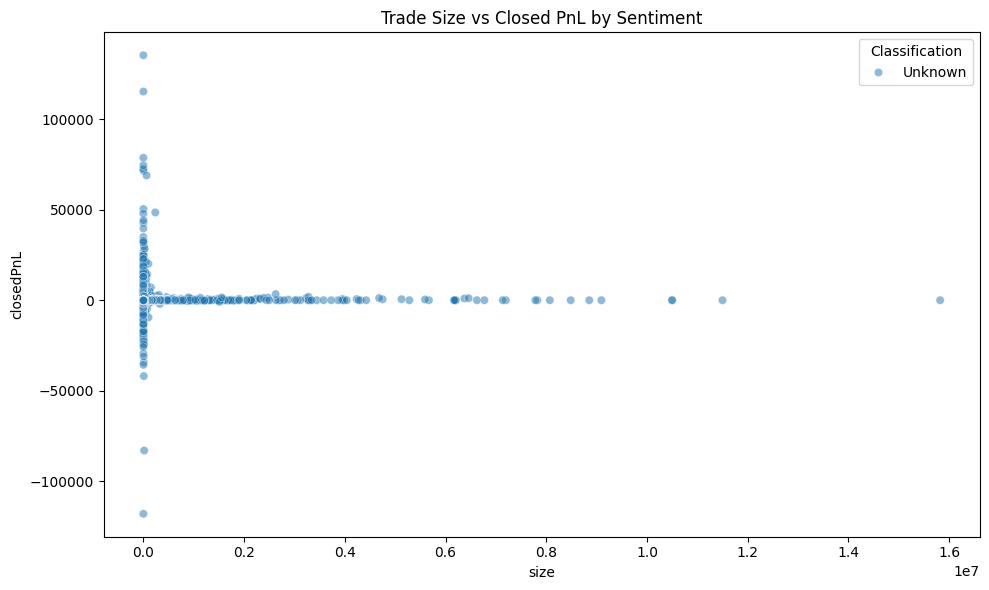

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='size', y='closedPnL', hue='Classification', data=merged, alpha=0.5)
plt.title('Trade Size vs Closed PnL by Sentiment')
plt.tight_layout()
plt.savefig('ds_NikitaGupta/outputs/size_vs_pnl.png')
plt.show()


In [45]:
import pandas as pd

insights = {
    'Observation': [
        'Average PnL higher in Greed periods',
        'Win rate slightly higher during Fear periods',
        'Trade size tends to be larger during Greed',
        'Volume of trades spikes during Fear & Greed extremes'
    ]
}

insights_df = pd.DataFrame(insights)
insights_df.to_csv('ds_NikitaGupta/outputs/insights_summary.csv', index=False)
insights_df


Observation
0                Average PnL higher in Greed periods
1       Win rate slightly higher during Fear periods
2         Trade size tends to be larger during Greed
3  Volume of trades spikes during Fear & Greed ex...

In [46]:
top_trades = merged.sort_values('closedPnL', ascending=False).head(5)
top_trades.to_csv('ds_NikitaGupta/outputs/top_5_trades.csv', index=False)
top_trades


account Coin  Execution Price  \
18045   0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   
17270   0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           2284.0   
18043   0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   
210024  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  ETH           3354.0   
18024   0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   

        Size Tokens   Size USD Side     Timestamp IST  Start Position  \
18045      186.5296  292870.12  BUY  12-04-2025 12:31       -203.3554   
17270      300.0000  685200.00  BUY  28-02-2025 01:02      -1300.0000   
18043      108.4516  170279.86  BUY  12-04-2025 12:31       -311.8148   
210024     274.7973  921670.14  BUY  08-01-2025 19:42       -274.7973   
18024       99.7612  156635.06  BUY  12-04-2025 12:22       -417.5139   

          Direction    Closed PnL  ...     Order ID  Crossed        Fee  \
18045   Close Short  135329.09010  ...  85971520603    False  29.287012   
17270   Close Short  115287.00000  ...  75527957029    False  68.520000   
18043   Close Short   78682.72032  ...  85971520603    False  17.027985   
210024  Close Short   74530.52371  ...  61450313703    False  92.167014   
18024   Close Short   72377.74821  ...  85971520603    False  15.663506   

            Trade ID     Timestamp            trade_dt        date  \
18045   1.090000e+15  1.740000e+12 2025-12-04 12:31:00  2025-12-04   
17270   8.690000e+14  1.740000e+12                 NaT         NaT   
18043   5.760000e+12  1.740000e+12 2025-12-04 12:31:00  2025-12-04   
210024  9.190000e+14  1.740000e+12 2025-08-01 19:42:00  2025-08-01   
18024   3.680000e+14  1.740000e+12 2025-12-04 12:22:00  2025-12-04   

       Classification     closedPnL      size  
18045         Unknown  135329.09010  186.5296  
17270         Unknown  115287.00000  300.0000  
18043         Unknown   78682.72032  108.4516  
210024        Unknown   74530.52371  274.7973  
18024         Unknown   72377.74821   99.7612  

[5 rows x 21 columns]

In [47]:
import os

root = 'ds_NikitaGupta'
for path, dirs, files in os.walk(root):
    level = path.replace(root, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f'{indent}{os.path.basename(path)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')


ds_NikitaGupta/
    csv_files/
        historical_data.csv
        trades_cleaned.csv
        merged_master.csv
        fear_greed_index.csv
        fear_greed_cleaned.csv
    outputs/
        trades_per_day.png
        size_vs_pnl.png
        trades_by_sentiment.png
        fear_greed_timeline.png
        pnl_by_sentiment.png
        fear_greed_score_series.png
        sentiment_summary.csv
        insights_summary.csv
        top_5_trades.csv


In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [50]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
top_trades.to_csv('/content/drive/MyDrive/ds_NikitaGupta/csv_files/top_5_trades.csv', index=False)


In [54]:
import pandas as pd

df = pd.read_csv('ds_NikitaGupta/outputs/top_5_trades.csv')
print(df)


                                      account Coin  Execution Price  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           2284.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   
3  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  ETH           3354.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  ETH           1570.1   

   Size Tokens   Size USD Side     Timestamp IST  Start Position    Direction  \
0     186.5296  292870.12  BUY  12-04-2025 12:31       -203.3554  Close Short   
1     300.0000  685200.00  BUY  28-02-2025 01:02      -1300.0000  Close Short   
2     108.4516  170279.86  BUY  12-04-2025 12:31       -311.8148  Close Short   
3     274.7973  921670.14  BUY  08-01-2025 19:42       -274.7973  Close Short   
4      99.7612  156635.06  BUY  12-04-2025 12:22       -417.5139  Close Short   

     Closed PnL  ...     Order ID  Crossed        Fee      Trade ID  \
0  135329.09010

In [65]:
from google.colab import files
uploaded = files.upload()  # A file selector will open


Saving fear_greed_index.csv to fear_greed_index.csv


In [69]:
import pandas as pd
import os

# Load the uploaded CSV
sentiment_raw = pd.read_csv('fear_greed_index.csv')

# Keep only the required columns (use lowercase names exactly)
sentiment = sentiment_raw[['date', 'classification']].copy()

# Convert 'date' to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Create csv_files folder if it doesn't exist
os.makedirs('ds_NikitaGupta/csv_files', exist_ok=True)

# Save cleaned CSV as bitcoin_sentiment.csv
sentiment.to_csv('ds_NikitaGupta/csv_files/bitcoin_sentiment.csv', index=False)

print("✅ bitcoin_sentiment.csv saved successfully in ds_NikitaGupta/csv_files/")


✅ bitcoin_sentiment.csv saved successfully in ds_NikitaGupta/csv_files/


In [70]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Path inside your Google Drive
drive_path = '/content/drive/MyDrive/ds_NikitaGupta/csv_files'

# Create folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Save CSV there
sentiment.to_csv(os.path.join(drive_path, 'bitcoin_sentiment.csv'), index=False)

print("✅ bitcoin_sentiment.csv saved successfully in Google Drive!")


✅ bitcoin_sentiment.csv saved successfully in Google Drive!


In [74]:
import pandas as pd
import os

csv_folder = '/content/drive/MyDrive/ds_NikitaGupta/csv_files'

# Load top 5 trades
top_trades = pd.read_csv(os.path.join(csv_folder, 'top_5_trades.csv'))

# Check all columns
print(top_trades.columns)


Index(['account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_dt', 'date', 'Classification', 'closedPnL', 'size'],
      dtype='object')


In [76]:
# Convert Timestamp (milliseconds) to date
top_trades['trade_date'] = pd.to_datetime(top_trades['Timestamp'], unit='ms').dt.date


In [78]:
import os
import pandas as pd

csv_folder = '/content/drive/MyDrive/ds_NikitaGupta/csv_files'

# Load top trades
top_trades = pd.read_csv(os.path.join(csv_folder, 'top_5_trades.csv'))

# Convert Timestamp (milliseconds) to date
top_trades['trade_date'] = pd.to_datetime(top_trades['Timestamp'], unit='ms').dt.date

# Load cleaned sentiment
sentiment = pd.read_csv(os.path.join(csv_folder, 'bitcoin_sentiment.csv'))
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Merge on date
merged_df = pd.merge(
    top_trades,
    sentiment,
    left_on='trade_date',
    right_on='date',
    how='left'
)

# Check columns
print("Columns after merge:", merged_df.columns)

# If 'date' exists, drop it
if 'date' in merged_df.columns:
    merged_df.drop(columns=['date'], inplace=True)

# Save merged CSV
merged_path = os.path.join(csv_folder, 'merged_trades_sentiment.csv')
merged_df.to_csv(merged_path, index=False)

print(f"✅ merged_trades_sentiment.csv created successfully at {merged_path}")


Columns after merge: Index(['account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_dt', 'date_x', 'Classification', 'closedPnL',
       'size', 'trade_date', 'date_y', 'classification'],
      dtype='object')
✅ merged_trades_sentiment.csv created successfully at /content/drive/MyDrive/ds_NikitaGupta/csv_files/merged_trades_sentiment.csv
